# Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np

In [144]:
df = pd.read_csv('nfl_pass_rush_receive_raw_data.csv')
df.head(5)

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05


In [145]:
df.columns

Index(['game_id', 'player_id', 'pos', 'player', 'team', 'pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td', 'rec_long',
       'fumbles_lost', 'rush_scrambles', 'designed_rush_att',
       'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play',
       'Team_abbrev', 'Opponent_abbrev', 'two_point_conv', 'total_ret_td',
       'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus',
       'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP',
       'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws',
       'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac',
       'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense',
       'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'OT',
       'Roof', 'Surface', 'Temperature', 'Humidit

# Data Manipulation

In [3]:
keep = ['game_id','pos', 'player', 'team', 'pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long','vis_team', 'home_team', 'vis_score', 'home_score','offense']
df_qb = df.loc[df["pos"] == 'QB',keep]
df_qb.shape

(1994, 22)

In [4]:
df_qb['pass_cmp_pct'] = df_qb['pass_cmp']/df_qb['pass_att']
df_qb['pass_cmp_pct'].fillna(0,inplace = True)
df_qb['home_status'] = np.where(df_qb['team']==df_qb['home_team'], 'home', 'vis')
df_qb['home_win'] = np.where(df_qb['home_score'] > df_qb['vis_score'],1,0)
df_qb['vis_win'] = np.where(df_qb['home_score'] < df_qb['vis_score'],1,0)
df_qb['win'] = np.where(((df_qb['home_status'] == "home") & (df_qb['home_win'] == 1)) |
                        ((df_qb['home_status'] == "vis") & (df_qb['vis_win'] == 1)), 1,0)

df_qb_sorted = df_qb.sort_values(["game_id","team","offense"])
df_qb_nodups = df_qb_sorted.groupby(['game_id','team']).last()
df_qb_nodups.drop(['home_status','home_win','vis_win'],axis=1)
df_qb_nodups.sort_values('offense')

,,pos,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,...,vis_team,home_team,vis_score,home_score,offense,pass_cmp_pct,home_status,home_win,vis_win,win
game_id,team,,,,,,,,,,,,,,,,,,,,,
202011290den,DEN,QB,Kendall Hinton,1,9,13,0,2,1,1,13,...,NOR,DEN,31,3,24,0.111111,home,0,1,0
202101030ram,ARI,QB,Chris Streveler,11,16,105,1,1,2,10,19,...,ARI,LAR,7,18,28,0.687500,vis,1,0,0
201909150pit,PIT,QB,Ben Roethlisberger,8,15,75,0,0,1,7,15,...,SEA,PIT,28,26,28,0.533333,home,0,1,0
201910240min,WAS,QB,Case Keenum,12,16,130,0,0,2,14,18,...,WAS,MIN,9,19,29,0.750000,vis,1,0,0
202112050htx,HOU,QB,Tyrod Taylor,5,13,45,0,1,2,24,15,...,IND,HOU,31,0,29,0.384615,home,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202001110rav,BAL,QB,Lamar Jackson,31,59,365,1,2,4,20,38,...,TEN,BAL,28,12,94,0.525424,home,0,1,0
202011010mia,LAR,QB,Jared Goff,35,61,355,1,2,2,15,26,...,LAR,MIA,17,28,95,0.573770,vis,1,0,0
202111070rav,BAL,QB,Lamar Jackson,27,41,266,3,2,3,13,22,...,MIN,BAL,31,34,98,0.658537,home,1,0,1


# EDA

In [5]:
import seaborn as sns

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,63.691373,11.751876,24.0,57.0,64.0,71.0,100.0
1,817.0,65.776010,9.278904,32.0,60.0,66.0,72.0,98.0


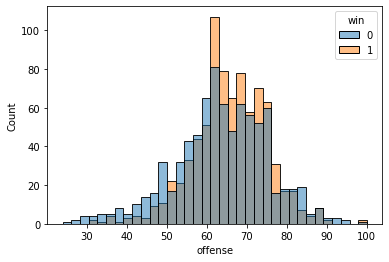

In [6]:
sns.histplot(df_qb_nodups, x="offense", hue="win")
df_qb_nodups.groupby('win')['offense'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,22.196841,6.751058,1.0,18.0,22.0,27.0,47.0
1,817.0,21.569155,6.035266,2.0,17.0,22.0,26.0,39.0


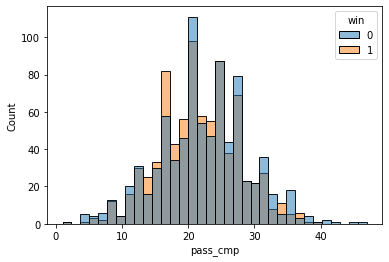

In [45]:
sns.histplot(df_qb_nodups, x="pass_cmp", hue="win")
df_qb_nodups.groupby('win')['pass_cmp'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,35.99271,9.220333,9.0,30.0,36.0,42.0,68.0
1,817.0,31.71481,7.981946,3.0,26.0,31.0,37.0,56.0


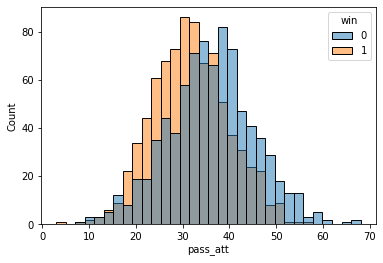

In [46]:
sns.histplot(df_qb_nodups, x="pass_att", hue="win")
df_qb_nodups.groupby('win')['pass_att'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,237.088700,79.185809,13.0,186.0,238.0,291.0,517.0
1,817.0,250.432069,79.199770,19.0,195.0,244.0,306.0,525.0


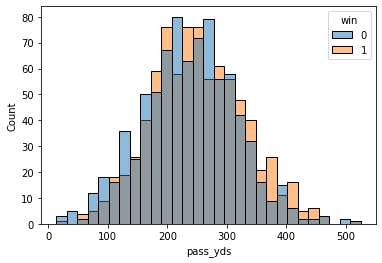

In [47]:
sns.histplot(df_qb_nodups, x="pass_yds", hue="win")
df_qb_nodups.groupby('win')['pass_yds'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,1.217497,1.033542,0.0,0.0,1.0,2.0,5.0
1,817.0,1.905753,1.237557,0.0,1.0,2.0,3.0,5.0


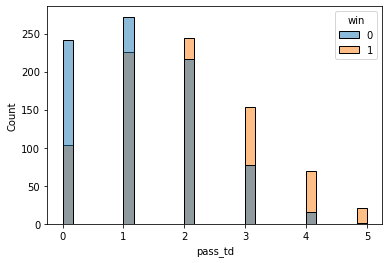

In [51]:
sns.histplot(df_qb_nodups, x="pass_td", hue="win")
df_qb_nodups.groupby('win')['pass_td'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,1.044957,1.008080,0.0,0.0,1.0,2.0,5.0
1,817.0,0.466340,0.672758,0.0,0.0,0.0,1.0,4.0


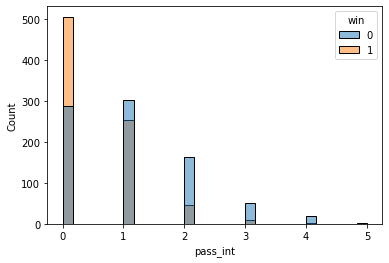

In [50]:
sns.histplot(df_qb_nodups, x="pass_int", hue="win")
df_qb_nodups.groupby('win')['pass_int'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,2.776428,1.797153,0.0,1.0,3.0,4.0,9.0
1,817.0,1.711138,1.362051,0.0,1.0,1.0,3.0,9.0


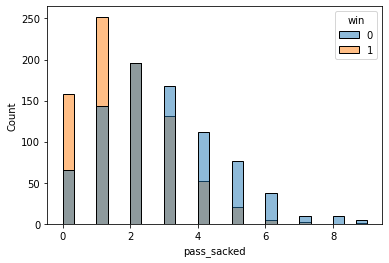

In [52]:
sns.histplot(df_qb_nodups, x="pass_sacked", hue="win")
df_qb_nodups.groupby('win')['pass_sacked'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,19.360875,13.813311,0.0,10.0,17.0,27.0,79.0
1,817.0,11.078335,10.105266,0.0,3.0,9.0,16.0,68.0


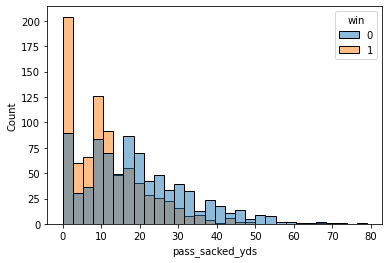

In [53]:
sns.histplot(df_qb_nodups, x="pass_sacked_yds", hue="win")
df_qb_nodups.groupby('win')['pass_sacked_yds'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,36.352369,14.351336,8.0,26.0,34.0,44.0,92.0
1,817.0,39.959608,14.667126,12.0,29.0,39.0,48.0,93.0


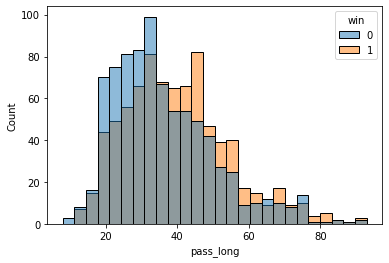

In [54]:
sns.histplot(df_qb_nodups, x="pass_long", hue="win")
df_qb_nodups.groupby('win')['pass_long'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,79.551033,23.898082,0.0,65.75,80.4,94.4,150.5
1,817.0,104.619706,23.559179,17.0,88.60,104.9,121.3,158.3


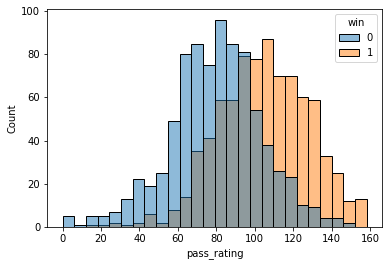

In [56]:
sns.histplot(df_qb_nodups, x="pass_rating", hue="win")
df_qb_nodups.groupby('win')['pass_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,3.015796,2.765532,0.0,1.0,2.0,4.0,20.0
1,817.0,4.219094,3.350041,0.0,2.0,4.0,6.0,21.0


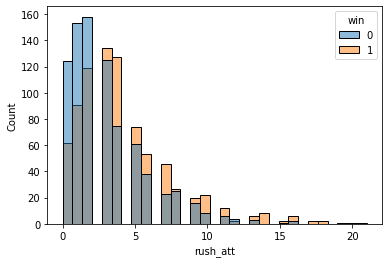

In [57]:
sns.histplot(df_qb_nodups, x="rush_att", hue="win")
df_qb_nodups.groupby('win')['rush_att'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,16.370595,20.534701,-7.0,1.0,10.0,23.0,143.0
1,817.0,16.347613,23.010049,-5.0,1.0,8.0,23.0,152.0


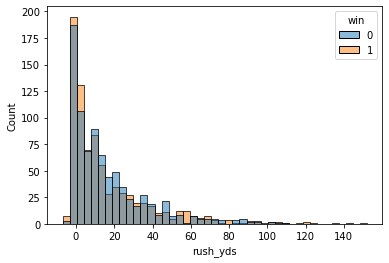

In [58]:
sns.histplot(df_qb_nodups, x="rush_yds", hue="win")
df_qb_nodups.groupby('win')['rush_yds'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,0.133657,0.371257,0.0,0.0,0.0,0.0,2.0
1,817.0,0.230110,0.505775,0.0,0.0,0.0,0.0,3.0


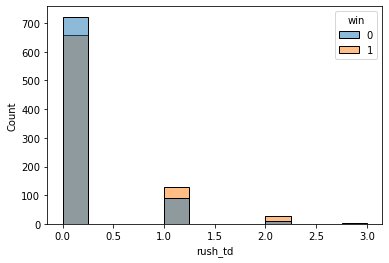

In [59]:
sns.histplot(df_qb_nodups, x="rush_td", hue="win")
df_qb_nodups.groupby('win')['rush_td'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,7.952612,8.327771,-3.0,2.0,7.0,12.0,80.0
1,817.0,8.428397,8.991558,-3.0,2.0,6.0,12.0,52.0


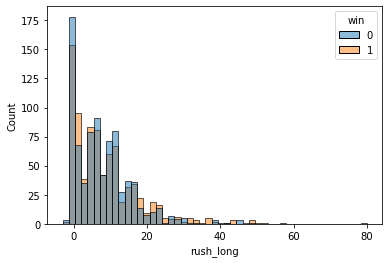

In [60]:
sns.histplot(df_qb_nodups, x="rush_long", hue="win")
df_qb_nodups.groupby('win')['rush_long'].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
0,823.0,0.612667,0.092936,0.111111,0.555556,0.615385,0.678571,0.880000
1,817.0,0.679827,0.089990,0.375000,0.621622,0.685714,0.742857,0.966667


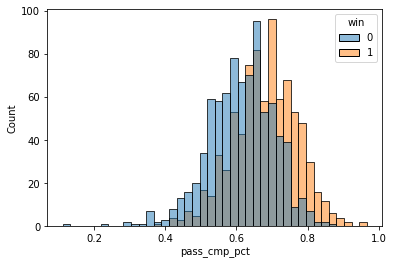

In [61]:
sns.histplot(df_qb_nodups, x="pass_cmp_pct", hue="win")
df_qb_nodups.groupby('win')['pass_cmp_pct'].describe()

# Fit Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [77]:
#split dataset in features and target variable
feature_cols = ['pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long','pass_cmp_pct','offense']
x = df_qb_nodups[feature_cols] # Features
y = df_qb_nodups.win # Target variable

In [78]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [140]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth = 6)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_test = clf.predict(x_test)

#Predict the response for train dataset
y_pred_train = clf.predict(x_train)


# Evaluate Model

In [146]:
# Model Accuracy
print("Accuracy_train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy_test:",metrics.accuracy_score(y_test, y_pred_test))
## Accuracy test maximized when criterion = 'gini' and max_depth = 6

Accuracy_train: 0.8222996515679443
Accuracy_test: 0.7134146341463414


In [142]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[155  88]
 [ 53 196]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       243
           1       0.69      0.79      0.74       249

    accuracy                           0.71       492
   macro avg       0.72      0.71      0.71       492
weighted avg       0.72      0.71      0.71       492



In [106]:
importance = clf.feature_importances_
importance_table = pd.DataFrame({'Feature' : feature_cols, 'Importance' : importance})
importance_table.sort_values(by=['Importance'], ascending=False).head(14)

,Feature,Importance
4,pass_int,0.206239
12,pass_cmp_pct,0.195633
6,pass_sacked_yds,0.150562
13,offense,0.108530
1,pass_att,0.107490
7,pass_long,0.066278
3,pass_td,0.040174
9,rush_yds,0.034109
2,pass_yds,0.032301
0,pass_cmp,0.031182


# Export Tree

In [87]:
! pip install graphviz

In [116]:
from sklearn.tree import export_graphviz
export_graphviz(clf, 'tree.dot', feature_names = feature_cols)

In [117]:
fn=feature_cols
cn=['loss', 'win']
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)